In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [137]:
df=pd.read_csv("titanic_full.csv")

In [138]:
df.head()

,Pclass,Fare,Survived
0,3,7.2500,0
1,1,71.2833,1
2,3,7.9250,1
3,1,53.1000,1
4,3,8.0500,0


In [139]:
df.shape

(1308, 3)

In [140]:
misssing_value=df.isnull().sum()
print(misssing_value)

Pclass      0
Fare        0
Survived    0
dtype: int64


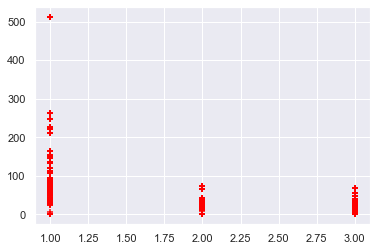

In [141]:
plt.scatter(df['Pclass'],df['Fare'],marker='+',color='red')

In [142]:
import seaborn as sns

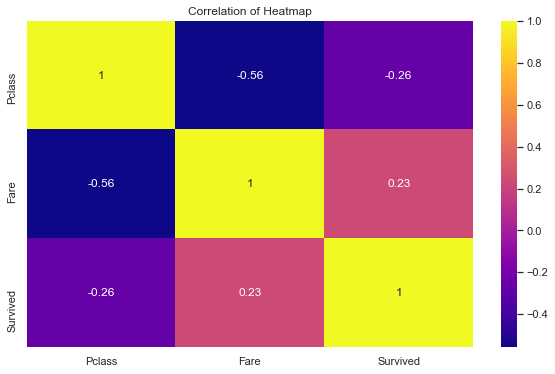

In [143]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="plasma")
plt.title('Correlation of Heatmap' )
plt.show()

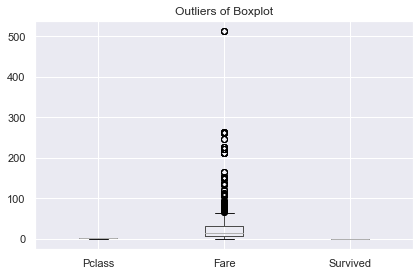

In [98]:
sns.set(style='darkgrid')
df.boxplot(column=['Pclass','Fare','Survived'])
plt.title('Outliers of Boxplot')
plt.tight_layout()
plt.show()

In [144]:
df['Fare']=df['Fare'].astype(int)

In [145]:
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1

In [146]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['Fare']>=lower_bound)&(df['Fare']<=upper_bound)]

In [148]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [150]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [151]:
model.score(x_test,y_test)

0.6578947368421053

In [152]:
model.coef_

array([[-0.15139657,  0.03204924]])

In [153]:
model.intercept_

array([-0.81743807])